In [35]:
import json
import pandas as pd
import tweepy
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
from config import consumer_key,consumer_secret,access_token,access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import time
analyzer = SentimentIntensityAnalyzer()

In [36]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [37]:
target = ['@BBC', '@CBS', '@CNN', '@FoxNews', '@NYTimes']
sent = []
for user in target:
    count = 0
    tweets = api.user_timeline(user, count=100)
    print(f'Analyzing {user}')
    for tweet in tweets:
        tweets_ago = count
        comp = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        text = tweet["text"] 
        sent.append({"User": user,
                         "Date": tweet["created_at"],
                         "Compound": comp,
                         "Positive": pos,
                         "Negative": neg,
                         "Neutral": neu,
                         "Tweets Ago": count,
                         "Text": text})
        count = count + 1

Analyzing @BBC
Analyzing @CBS
Analyzing @CNN
Analyzing @FoxNews
Analyzing @NYTimes


In [38]:
sent_df = pd.DataFrame.from_dict(sent)
sent_df.head()

,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago,User
0,0.0000,Tue Mar 27 18:30:07 +0000 2018,0.0,1.000,0.000,When mother Marie mysteriously leaves the fami...,0,@BBC
1,0.2942,Tue Mar 27 18:00:08 +0000 2018,0.0,0.872,0.128,"🇩🇪😂 Even if you don't speak German, this is wo...",1,@BBC
2,0.0000,Tue Mar 27 17:00:07 +0000 2018,0.0,1.000,0.000,🍜 We've got oodles of noodles with recipes for...,2,@BBC
3,0.0000,Tue Mar 27 16:00:15 +0000 2018,0.0,1.000,0.000,😬 What does Facebook know about you? https://t...,3,@BBC
4,0.6114,Tue Mar 27 15:40:40 +0000 2018,0.0,0.750,0.250,RT @BBCTwo: Happy #WorldTheatreDay! *leaves th...,4,@BBC


In [39]:
sent_df.to_csv("Twitter Sentiment Analysis.csv", index = False)
Date = dt.now().strftime("(%m/%d/%Y)")

In [40]:
for user in target:
    user_df = sent_df.loc[sent_df["User"] == user]
    plt.scatter(user_df["Tweets Ago"],user_df["Compound"],label = user)

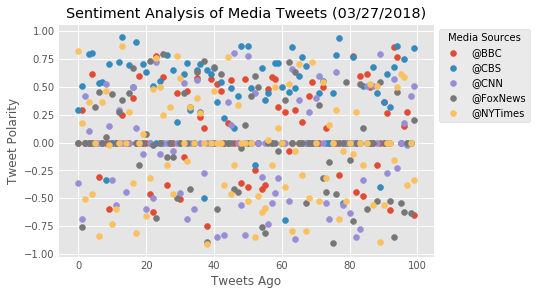

In [41]:
plt.style.use('ggplot')
plt.title("Sentiment Analysis of Media Tweets "+str(Date))
plt.legend(bbox_to_anchor=(1,1), title='Media Sources')
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.savefig("Twitter Sentiment Analysis of News Outlets")
plt.show()

In [42]:
group = sent_df.groupby("User")
means_sentiments = group["Compound"].mean()
means_sentiments.head()

User
@BBC        0.096663
@CBS        0.358544
@CNN       -0.045861
@FoxNews   -0.007286
@NYTimes   -0.033544
Name: Compound, dtype: float64

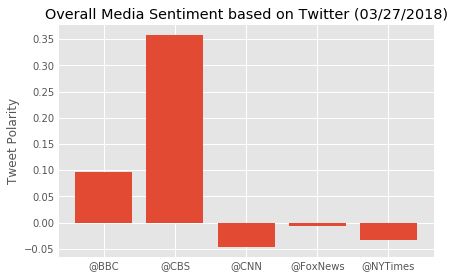

In [43]:
x_axis = np.arange(len(means_sentiments))
plt.bar(x_axis, means_sentiments, tick_label = target)
plt.title("Overall Media Sentiment based on Twitter " +str(Date))
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of News Tweets")
plt.show()